In [ ]:
import os

## switch to the root dir

In [ ]:
os.chdir('..')
os.listdir()

['opt',
 'dev',
 'run',
 'etc',
 'root',
 'usr',
 'boot',
 'srv',
 'sys',
 'proc',
 'var',
 'home',
 'tmp',
 'lib64',
 'mnt',
 'media',
 'lib',
 'sbin',
 'bin',
 'content',
 '.dockerenv',
 'tools',
 'datalab',
 'tensorflow-1.15.2',
 'python-apt',
 'lib32']

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/6321_project')
os.listdir()

['jupyter',
 'processed_data',
 'trainers',
 'models',
 'data_processor',
 'data_loader',
 'loggers',
 'saved_models',
 'model']

In [ ]:
from data_processor.utils import load_numpy_arrays, numpy_to_tensor
from models.MusicCNN1d import MusicCNN1d
import trainers.SGD_trainer
from loggers.statistics_loggers import plot_numerical_arrays
import torch
from torch import nn

## Load preprocessed data

In [ ]:
X_train, y_train, X_val, y_val = load_numpy_arrays(['data_train_X.npy','data_train_y.npy', 'data_val_X.npy','data_val_y.npy']
                  , path_prefix='processed_data/processed_waves/10-genres/')

In [ ]:
X_train, y_train, X_val, y_val = numpy_to_tensor([X_train, y_train, X_val, y_val])

In [ ]:
y_train = y_train.type(torch.int64)
y_val = y_val.type(torch.int64)

In [ ]:
X_train = torch.transpose(X_train, 1, 2)
X_val = torch.transpose(X_val, 1, 2)

In [ ]:
print(X_train.shape)
print(y_train.shape)

torch.Size([2390, 40, 501])
torch.Size([2390])


In [ ]:
print(X_train[0])
print(y_train[0])

tensor([[ 0.4324,  0.7034,  0.6879,  ...,  0.9628,  0.8118,  0.4746],
        [ 0.5236,  0.6647,  0.5071,  ...,  0.9904,  0.8570,  0.5449],
        [ 0.5394,  0.4897,  0.1787,  ...,  0.9130,  0.7527,  0.4947],
        ...,
        [ 0.7697,  0.4557,  0.1181,  ...,  0.3897,  0.1811, -0.2057],
        [ 0.7055,  0.3747,  0.2188,  ...,  0.3010,  0.2039, -0.4388],
        [ 0.3866,  0.2816,  0.3338,  ...,  0.0407, -0.0195, -0.4447]])
tensor(0)


In [ ]:
print(X_val.shape)
print(y_val.shape)

torch.Size([299, 40, 501])
torch.Size([299])


## Load model

1. define model under the folder models
2. import and define the model

In [ ]:
model = MusicCNN1d(CNN_input_channels=40, CNN_out_channels=[64, 128, 256, 256], pooling='avg', DNN_input_dim=512, DNN_output_dim=10, DNN_hidden_dims=[70])

In [ ]:
n_feat = X_train.shape[1]
X_a = X_train[:10]
print(X_a.shape)
pred = model(X_a)
print(pred.shape)

torch.Size([10, 40, 501])
torch.Size([10, 10])


## Define loss and optimizer

In [ ]:
lr = 0.001
weight_decay = 1e-5
batch_size = 400
num_epoch = 60
model_name = 'CNN1d'
saved_model_name = 'saved_models/saved_' + model_name + '_wave.pt'

In [ ]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

## Train

use trainers.SGD_trainer.train or define a trainer

parameters of SGD_trainer.train
- model
- train_array: a tuple (X_train, y_train, X_val, y_val)
- loss
- optimizer
- batch_size
- num_epoch
- device

In [ ]:
#X_train_1d = X_train.reshape((-1, 1, n_feat))
#print(X_train.shape)
#X_val_1d = X_val.reshape((-1, 1, n_feat))
training_loss_array, training_accuracy_array, validation_loss_array, validation_accuracy_array = trainers.SGD_trainer.train(model, (X_train, y_train, X_val, y_val), 
                  loss, optimizer, batch_size = batch_size, num_epoch = num_epoch, device='cuda', saved_model_name=saved_model_name)

Epoch  0: loss on final training batch: 1.7104
training accuracy: 44.77% validation accuracy: 42.81%
Epoch  1: loss on final training batch: 1.4231
training accuracy: 58.20% validation accuracy: 53.85%
Epoch  2: loss on final training batch: 1.1428
training accuracy: 66.74% validation accuracy: 60.87%
Epoch  3: loss on final training batch: 0.9294
training accuracy: 74.18% validation accuracy: 66.22%
Epoch  4: loss on final training batch: 0.7182
training accuracy: 79.29% validation accuracy: 66.89%
Epoch  5: loss on final training batch: 0.5161
training accuracy: 86.32% validation accuracy: 70.23%
Epoch  6: loss on final training batch: 0.4328
training accuracy: 88.83% validation accuracy: 74.92%
Epoch  7: loss on final training batch: 0.3145
training accuracy: 91.59% validation accuracy: 73.91%
Epoch  8: loss on final training batch: 0.2461
training accuracy: 93.64% validation accuracy: 75.25%
Epoch  9: loss on final training batch: 0.1713
training accuracy: 96.78% validation accurac

## Plot

plot_numerical_arrays: plot multiple arrays with the same length

parameters:
- num_arrays: numerical arrays with the same length
- labels: labels of each array(with the same order of num_arrays)
- xlabel
- ylabel
- title

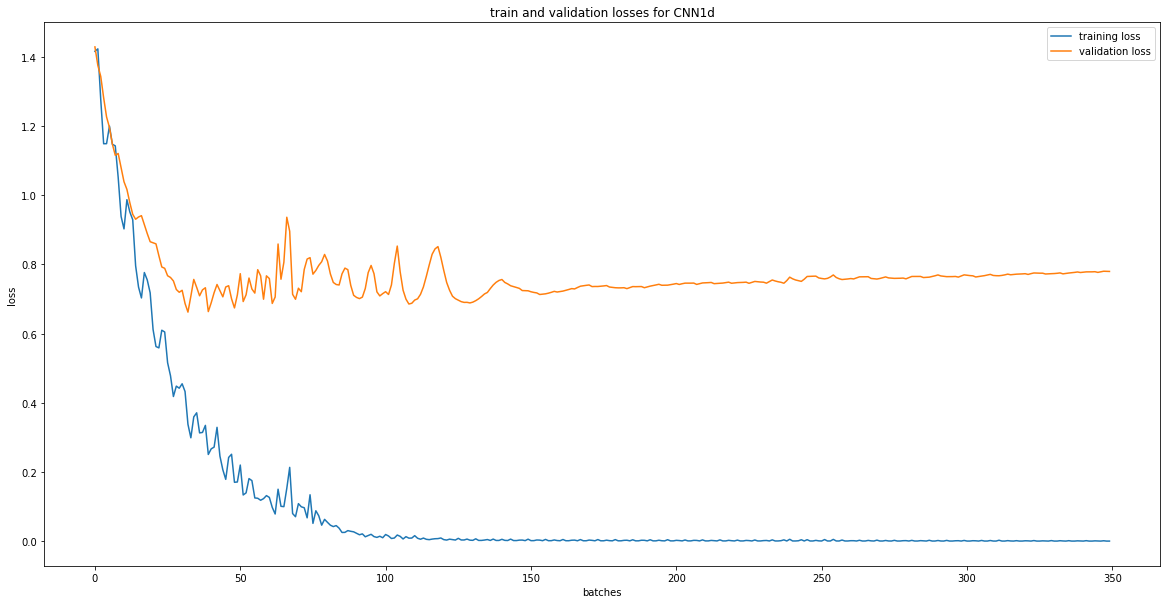

In [ ]:
plot_numerical_arrays([training_loss_array[10:], validation_loss_array[10:]], ['training loss', 'validation loss'], 
                      xlabel='batches', ylabel='loss', title='train and validation losses for ' + model_name)

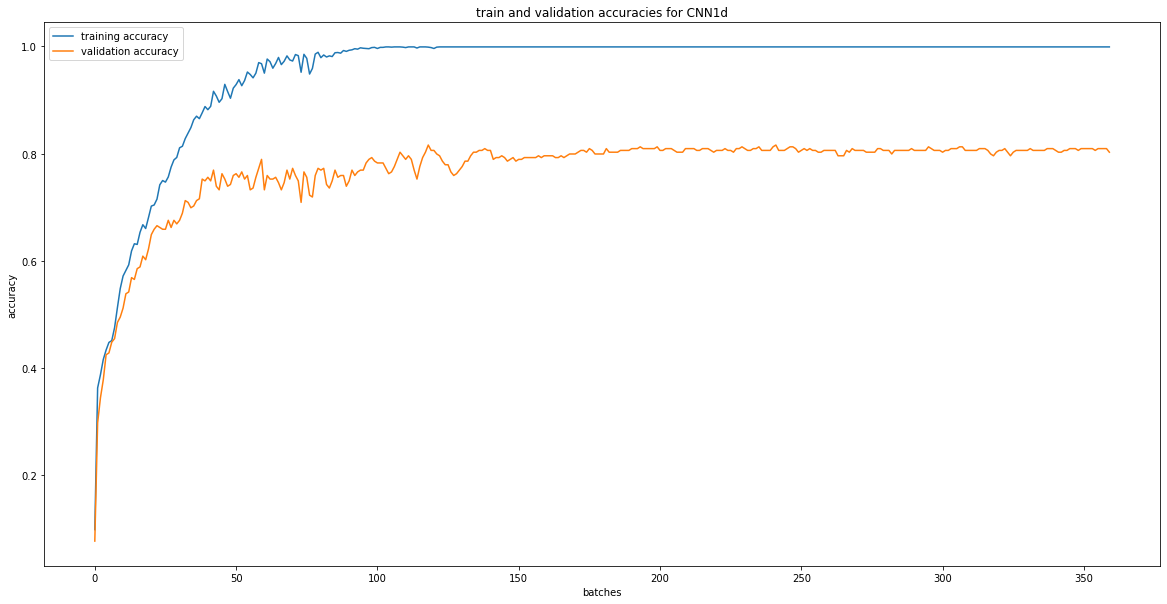

In [ ]:
plot_numerical_arrays([training_accuracy_array, validation_accuracy_array], ['training accuracy', 'validation accuracy'], 
                      xlabel='batches', ylabel='accuracy', title='train and validation accuracies for ' + model_name)